# Question 1: Stock Analysis Using Python

# 1.	Download Monthly Stock Price Data

In [1]:
import pandas as pd
import yfinance as yf

In [2]:
# download the daily stock price of LMT from 2015-01-01 to 2019-12-31
lmt = yf.download('LMT', start='2015-01-01', end='2019-12-31')

[*********************100%%**********************]  1 of 1 completed


In [21]:
#get the monthly stock price, which is the close price of each month
monthly_lmt = lmt['Adj Close'].resample('M').last()

In [79]:
#showcase the month stock price
print(monthly_lmt)

Date
2015-01-31    148.920517
2015-02-28    159.320999
2015-03-31    161.638550
2015-04-30    148.609344
2015-05-31    151.067841
2015-06-30    149.221573
2015-07-31    166.238785
2015-08-31    162.674637
2015-09-30    167.631348
2015-10-31    177.755127
2015-11-30    178.517761
2015-12-31    176.880539
2016-01-31    171.871017
2016-02-29    177.100815
2016-03-31    181.787064
2016-04-30    190.716385
2016-05-31    195.209625
2016-06-30    205.076309
2016-07-31    208.844482
2016-08-31    202.144577
2016-09-30    199.440613
2016-10-31    204.981552
2016-11-30    222.201645
2016-12-31    209.376358
2017-01-31    210.540787
2017-02-28    224.854324
2017-03-31    225.714615
2017-04-30    227.275101
2017-05-31    238.658173
2017-06-30    235.669968
2017-07-31    247.996368
2017-08-31    260.793427
2017-09-30    264.978027
2017-10-31    263.158936
2017-11-30    274.228149
2017-12-31    275.886780
2018-01-31    304.932098
2018-02-28    304.561707
2018-03-31    292.022919
2018-04-30    277.25

# 2.	Calculate Monthly Log Returns and Annualised Return 

In [24]:
import numpy as np

In [25]:
#calculate the log return of daily stock price and get the monthly log return, which is the last one of each month
lmt['LogRet'] = np.log(lmt['Adj Close'] / lmt['Adj Close'].shift(1))

In [26]:
monthly_lmt_log_return = lmt['LogRet'].resample('M').last()

In [29]:
print(monthly_lmt_log_return)

Date
2015-01-31   -0.021688
2015-02-28   -0.006378
2015-03-31   -0.009464
2015-04-30   -0.024823
2015-05-31   -0.010150
2015-06-30    0.002046
2015-07-31    0.003046
2015-08-31   -0.013430
2015-09-30    0.023623
2015-10-31    0.007214
2015-11-30   -0.030335
2015-12-31   -0.012130
2016-01-31    0.020783
2016-02-29   -0.006697
2016-03-31   -0.006570
2016-04-30   -0.001462
2016-05-31   -0.016208
2016-06-30    0.016618
2016-07-31   -0.007176
2016-08-31    0.014593
2016-09-30   -0.010870
2016-10-31   -0.006554
2016-11-30   -0.005002
2016-12-31   -0.002597
2017-01-31   -0.005951
2017-02-28   -0.010374
2017-03-31   -0.010927
2017-04-30   -0.006252
2017-05-31    0.003706
2017-06-30    0.003175
2017-07-31    0.005905
2017-08-31   -0.002975
2017-09-30    0.003746
2017-10-31   -0.001524
2017-11-30    0.001128
2017-12-31   -0.003265
2018-01-31    0.012649
2018-02-28   -0.010528
2018-03-31    0.007724
2018-04-30   -0.003702
2018-05-31   -0.014205
2018-06-30    0.000643
2018-07-31    0.018539
2018-0

In [78]:
#but if you are asking the cumulative log return during a month period, the thing is different:
monthly_cumulative_log_return = lmt['LogRet'].resample('M').sum().cumsum()
print(monthly_cumulative_log_return)

Date
2015-01-31   -0.025887
2015-02-28    0.041621
2015-03-31    0.056063
2015-04-30   -0.027979
2015-05-31   -0.011571
2015-06-30   -0.023867
2015-07-31    0.084125
2015-08-31    0.062452
2015-09-30    0.092467
2015-10-31    0.151107
2015-11-30    0.155388
2015-12-31    0.146175
2016-01-31    0.117445
2016-02-29    0.147419
2016-03-31    0.173536
2016-04-30    0.221488
2016-05-31    0.244774
2016-06-30    0.294082
2016-07-31    0.312290
2016-08-31    0.279683
2016-09-30    0.266217
2016-10-31    0.293620
2016-11-30    0.374286
2016-12-31    0.314834
2017-01-31    0.320380
2017-02-28    0.386153
2017-03-31    0.389972
2017-04-30    0.396861
2017-05-31    0.445733
2017-06-30    0.433133
2017-07-31    0.484114
2017-08-31    0.534429
2017-09-30    0.550347
2017-10-31    0.543458
2017-11-30    0.584661
2017-12-31    0.590691
2018-01-31    0.690789
2018-02-28    0.689574
2018-03-31    0.647533
2018-04-30    0.595636
2018-05-31    0.582054
2018-06-30    0.519375
2018-07-31    0.618147
2018-0

In [86]:
#calculate annualised return
lmt['Daily_Return'] = lmt['Adj Close'].pct_change()
annualized_return = lmt['Daily_Return'].mean() * 252
print("annualised return=:", annualized_return)

annualised return=: 0.18420586784319912


# 3. Calculate Annualised Volatility

In [87]:
#calculate annualised volatility
annualized_volatility = lmt['Daily_Return'].std() * np.sqrt(252)

In [88]:
print("annualised volatility=", annualized_volatility)

annualised volatility= 0.1756321863780029


# 4.	Download ESG Data and Handle Missing Values

In [37]:
pip install yesg

Note: you may need to restart the kernel to use updated packages.


In [38]:
import yesg

In [48]:
#get all of the ESG data of LMT 
ESG_row = yesg.get_historic_esg('LMT')

In [49]:
#choose the timeframe and the row of total score 
ESG = ESG_row.loc['2015-01-01':'2019-12-31', 'Total-Score']
ESG

Date
2015-01-01    72.00
2015-02-01    71.00
2015-03-01    69.00
2015-04-01    69.00
2015-05-01    70.00
2015-06-01    70.00
2015-07-01    70.00
2015-08-01    70.00
2015-09-01    70.00
2015-10-01    70.00
2015-11-01    70.00
2015-12-01    71.00
2016-01-01    71.33
2016-02-01    71.33
2016-03-01    71.33
2016-04-01    69.97
2016-05-01    69.97
2016-06-01    69.97
2016-07-01    69.27
2016-08-01    69.27
2016-09-01    69.27
2016-10-01    69.27
2016-11-01    69.27
2016-12-01    69.27
2017-01-01    69.29
2017-02-01    69.29
2017-03-01    68.42
2017-04-01    70.00
2017-05-01    69.56
2017-06-01    69.56
2017-07-01    69.56
2017-08-01    69.56
2017-09-01    69.56
2017-10-01    67.71
2017-11-01    67.71
2017-12-01    67.71
2018-01-01    67.71
2018-02-01    67.71
2018-03-01    67.71
2018-04-01    67.71
2018-05-01    67.71
2018-06-01    67.71
2018-07-01    67.71
2018-08-01    67.71
2018-09-01    62.87
2018-10-01    63.47
2018-11-01    63.37
2018-12-01    63.37
2019-01-01    63.37
2019-02-01    6

In [53]:
#there are 60 month in 5 years from 2015-1-1 to 2019-12-31, if there are 60 numbers, there is no number missing
print(len(ESG))
#the length of ESG is 60, so there is no NaN

60


In [55]:
# draw the picture of ESG Total Score for Lockheed Martin Corp.along with time changed
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ESG Total Score for Lockheed Martin Corp.')

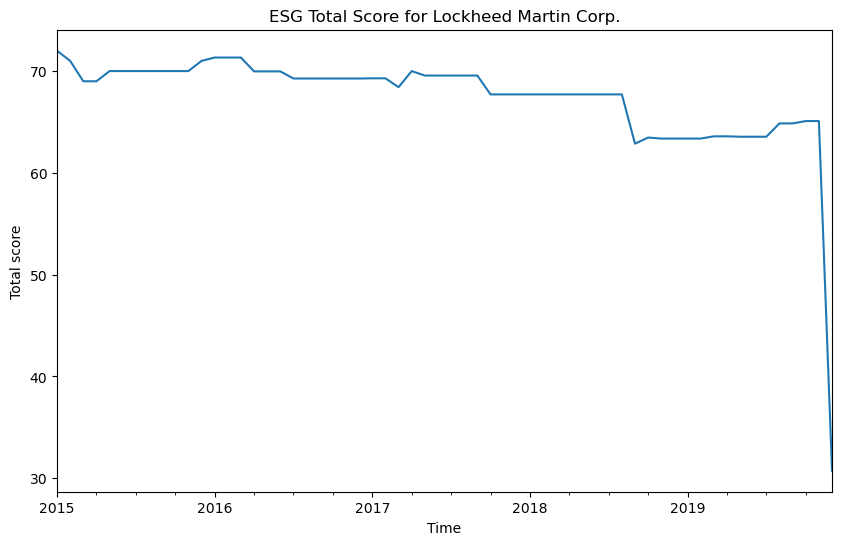

In [56]:
ESG.plot(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('Total score')
plt.title('ESG Total Score for Lockheed Martin Corp.')

analyse: As time progresses, the ESG Total Score for Lockheed Martin Corp. gradually decreased, reaching a decrease of over half by the last month of 2019.

# 5.	Calculate and Analyse the Correlation between Stock Price and ESG 

In [64]:
#Because the above monthly stock prices are at the end of the month, 
#and ESG data is at the beginning of the month, there is a time mismatch. 
#Therefore, get the stock prices at the beginning of the month.
monthly_lmt_new = lmt['Adj Close'].resample('MS').first()

In [84]:
print(monthly_lmt_new)

Date
2015-01-01    152.825958
2015-02-01    149.679459
2015-03-01    161.686310
2015-04-01    158.293655
2015-05-01    150.520721
2015-06-01    153.371521
2015-07-01    151.043701
2015-08-01    166.792648
2015-09-01    159.795990
2015-10-01    165.561325
2015-11-01    178.369614
2015-12-01    179.364899
2016-01-01    173.671219
2016-02-01    170.893555
2016-03-01    179.021255
2016-04-01    183.108414
2016-05-01    191.422134
2016-06-01    196.738373
2016-07-01    206.051422
2016-08-01    210.588089
2016-09-01    202.677032
2016-10-01    200.156143
2016-11-01    203.816803
2016-12-01    223.164993
2017-01-01    212.199402
2017-02-01    210.180557
2017-03-01    226.372528
2017-04-01    226.625580
2017-05-01    226.414658
2017-06-01    238.513855
2017-07-01    236.782059
2017-08-01    248.437759
2017-09-01    258.060760
2017-10-01    265.865967
2017-11-01    261.826721
2017-12-01    269.459045
2018-01-01    273.729858
2018-02-01    307.106140
2018-03-01    293.543701
2018-04-01    287.76

In [65]:
#calculate the correlation coefficient between the stock price and its ESG Total Score
correlation = monthly_lmt_new.corr(ESG)
print(f"The correlation between the stock price and ESG Total Score from Jan 2015 to Dec 2022 is {correlation:.4f}")

The correlation between the stock price and ESG Total Score from Jan 2015 to Dec 2022 is -0.5765


# Question 2: Climate Analysis Based on Birthplace

In [68]:
from datetime import datetime
from meteostat import Point, Daily

In [69]:
#I was born in May, so I use May 2022 for my timeframe and calculate CDD
start = datetime(2022, 5, 1)
end = datetime(2022, 5, 31)

In [71]:
# I was born in Beijing , so I use Beijing's (latitude, longitude, and altitude),which I got from Being
location = Point(39.916668, 116.383331, 50) 

In [72]:
data = Daily(location, start, end)
data = data.fetch()

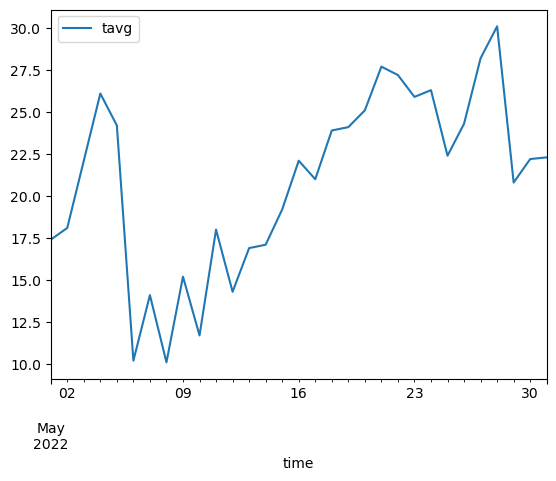

In [74]:
data.plot(y=['tavg'])
plt.show()

In [ ]:
#the formular of CDD is CDD = Max(0, daily average temperature - 65°F or 18℃)
#the formular of total CDDs is total CDDs= sum of CDDs

In [75]:
T_base = 18
cdds = [max(temp - T_base, 0) for temp in data.tavg]

In [76]:
total_cdd = sum(cdds)
print("Total CDD:", total_cdd)

Total CDD: 125.3


# Question 3: Critical Analysis on Cryptocurrencies and Environment

I believe Ethereum is more environmentally friendly because it strives to use less electricity. The reasons for this are as follows:

Bitcoin employs a consensus mechanism known as Proof-of-Work (PoW), which demands substantial computational power and electricity. Miners in the Bitcoin network compete for the right to create new blocks by solving mathematical puzzles, making the entire network highly energy-intensive. Currently, the Bitcoin community primarily focuses on improving the scalability and security of the network, with relatively little attention given to environmental concerns. There is no clear plan to transition to a more eco-friendly consensus mechanism.

On the other hand, Ethereum currently utilizes PoW but is transitioning towards a more sustainable consensus mechanism known as Proof-of-Stake (PoS). In PoS, a miner's influence is proportional to the amount of cryptocurrency they hold, eliminating the need for extensive energy consumption as seen in PoW. This transition indicates a proactive willingness within the Ethereum community to reduce energy consumption and environmental impact. The implementation of Ethereum 2.0 is expected to further enhance the environmental friendliness of Ethereum.